# installation

In [ ]:
import sys
print(f"Python Version: {sys.version}")

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
!pip install qiskit matplotlib qiskit[visualization]
!pip install qiskit-ibm-runtime
!pip install qiskit_serverless
!pip install qiskit-ibm-catalog

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=284b5867dbb8fe7a3589d030ea2d86ecce3effd89ea9367c5849ee6be6d165ad
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


# standard gates
 circuit with a Hadamard gate and a multi-controlled-X gate.
 A multi-controlled X gate flips the target qubit only if all the control qubits are in state |1〉

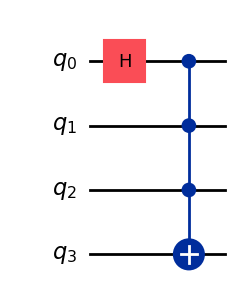

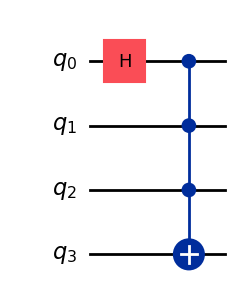

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate

mcx_gate = MCXGate(3)
hadamard_gate = HGate()

qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0]) # add imported gates to the circuit
qc.append(mcx_gate, [0, 1, 2, 3])
qc.draw("mpl")

In [ ]:
qc.qubits

[<Qubit register=(4, "q"), index=0>,
 <Qubit register=(4, "q"), index=1>,
 <Qubit register=(4, "q"), index=2>,
 <Qubit register=(4, "q"), index=3>]

# circuits

Multiple QuantumRegister and ClassicalRegister objects can be combined to create a circuit. Every QuantumRegister and ClassicalRegister can also be named.

In [ ]:
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr1 = QuantumRegister(2, "qreg1")  # Create a QuantumRegister with 2 qubits
qr2 = QuantumRegister(1, "qreg2")  # Create a QuantumRegister with 1 qubit
cr1 = ClassicalRegister(3, "creg1")  # Create a ClassicalRegister with 3 cbits

combined_circ = QuantumCircuit(
    qr1, qr2, cr1
)  # Create a quantum circuit with 2 QuantumRegisters and 1 ClassicalRegister
combined_circ.qubits

[<Qubit register=(2, "qreg1"), index=0>,
 <Qubit register=(2, "qreg1"), index=1>,
 <Qubit register=(1, "qreg2"), index=0>]

 find a qubit's index and register by using the circuit's find_bit method

In [ ]:
desired_qubit = qr2[0]  # Qubit 0 of register 'qreg2'

print("Index:", combined_circ.find_bit(desired_qubit).index)
print("Register:", combined_circ.find_bit(desired_qubit).registers)

Index: 2
Register: [(QuantumRegister(1, 'qreg2'), 0)]


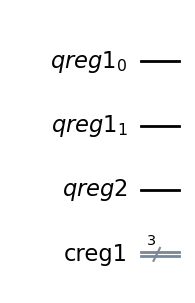

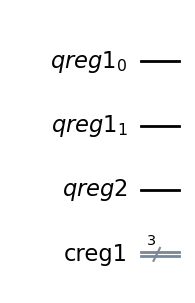

In [ ]:
combined_circ.draw("mpl")

## construct a quantum circuit

In [ ]:
qc = QuantumCircuit(2)
qc.qubits

[<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>]

In [ ]:
qc.x(0)  # Add X-gate to qubit 0
qc.data

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>,), clbits=())]

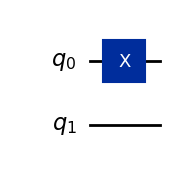

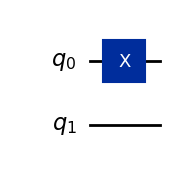

In [ ]:
qc.draw("mpl")

definition circuit

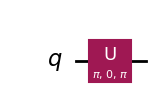

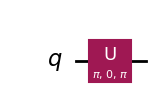

In [ ]:
# Draw definition circuit of 0th instruction in `qc`
qc.data[0].operation.definition.draw("mpl")

## combine 2 circuits -> compose method

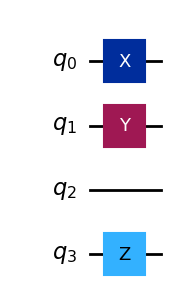

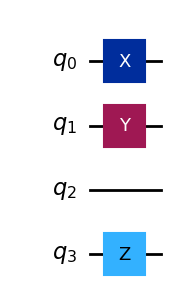

In [ ]:
qc_a = QuantumCircuit(4)
qc_a.x(0)

qc_b = QuantumCircuit(2, name="qc_b")
qc_b.y(0)
qc_b.z(1)

# compose qubits (0, 1) of qc_a to qubits (1, 3) of qc_b respectively
combined = qc_a.compose(qc_b, qubits=[1, 3])
combined.draw("mpl")

# convert circuit to Gate -> to_gate method

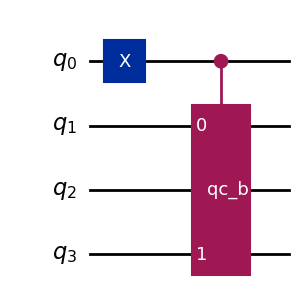

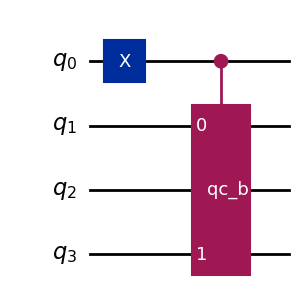

In [ ]:
gate = qc_b.to_gate().control()
qc_a.append(gate, [0, 1, 3]) #append gate from circuit B to qubits 0,1,3 of circuit A, while q0 is the control
qc_a.draw("mpl")

## Measure qubits
2 quantum bits (qubits) and 2 classical bits.
It measures the state of the qubit at index 0 and writes the outcome (0 or 1) to the classical bit at index 1.

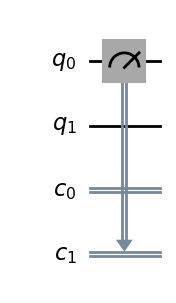

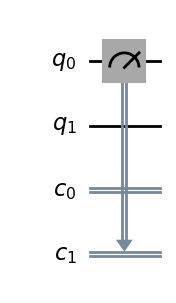

In [ ]:
qc1 = QuantumCircuit(2, 2)
qc1.measure(0, 1)
qc1.draw("mpl", cregbundle=False)

measure_all() function automatically adds classical bits (matching the number of qubits) to the circuit and then applies a measurement operation to all qubits, mapping each qubit's outcome to a corresponding classical bit.

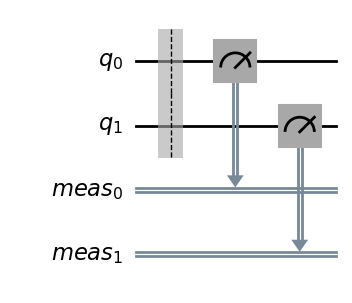

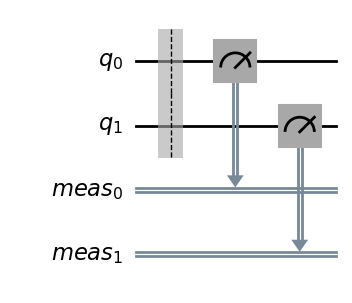

In [ ]:
qc2 = QuantumCircuit(2)
qc2.measure_all()
qc2.draw("mpl", cregbundle=False)

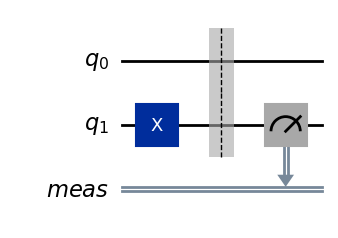

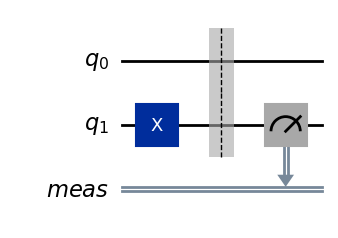

In [ ]:
qc3 = QuantumCircuit(2)
qc3.x(1)
qc3.measure_active()
qc3.draw("mpl", cregbundle=False)

# Create a simple quantum program
This example = Bell state, which is a state wherein two qubits are fully entangled with each other.

In this particular Bell state example, we are interested in measuring six different two-qubit Pauli operators: IZ, IX, ZI, XI, ZZ, and XX. These operators help us characterize the entanglement and properties of the Bell state:

I (Identity operator): Does nothing to the qubit.
X (Pauli-X operator): Represents a bit-flip (NOT gate).
Z (Pauli-Z operator): Represents a phase-flip.

In [19]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
token="token", # Use the 44-character API_KEY you created and saved from the IBM Quantum Platform Home dashboard
)

In [21]:
service = QiskitRuntimeService()

qiskit_runtime_service.__init__:WARNING:2025-11-14 15:38:37,354: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


four steps to writing a quantum program using Qiskit patterns

1. Map the problem to a quantum-native format.

2. Optimize the circuits and operators.

3. Execute using a quantum primitive function.

4. Analyze the results.

## Step 1. Map the problem to a quantum-native format

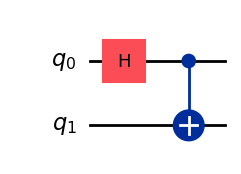

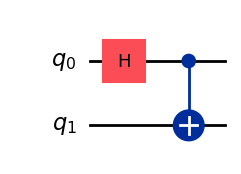

In [22]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

We must consider what type of data we want returned after execution. Qiskit provides two ways to return data:

1. we can obtain a probability distribution for a set of qubits we choose to measure

2. we can obtain the expectation value of an observable.

This example measures expectation values by using the qiskit.quantum_info submodule, which is specified by using operators (mathematical objects used to represent an action or process that changes a quantum state). The following code cell creates six two-qubit Pauli operators: IZ, IX, ZI, XI, ZZ, and XX.

In [23]:
# Set up six different observables.

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

## Step 2. Optimize the circuits and operators

instantiates a real device to submit a job to and transforms the circuit and observables to match that backend's ISA.

qiskit_runtime_service.__init__:WARNING:2025-11-14 15:47:02,671: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-14 15:47:02,936: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-11-14 15:47:04,442: Using instance: open-instance, plan: open


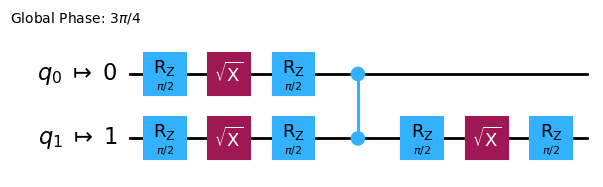

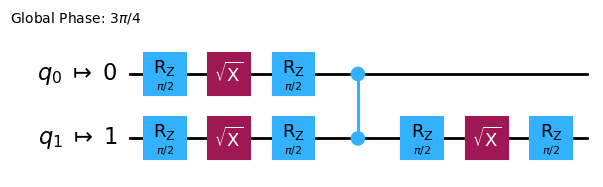

In [24]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)

# Convert to an ISA circuit and layout-mapped observables.
'''An ISA circuit refers to a quantum circuit that has been transpiled, or optimized,
 to match the Instruction Set Architecture (ISA) of a specific quantum backend
 (a real quantum computer or a simulator)'''
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)

## Step 3. Execute using the quantum primitives
Quantum computers can produce random results, so we usually collect a sample of the outputs by running the circuit many times (this example, 5000 times)

Before executing on a real quantum device, the abstract observables (IZ, IX, etc.) need to be mapped to the specific physical qubits of the isa_circuit

This line iterates through your defined observables and applies the layout from the isa_circuit to each one, ensuring they correspond to the correct physical qubits on the backend.

then it submits the quantum computation job to the backend.

In [25]:
# Construct the Estimator instance.
# Esimator = estimate the value of the observable

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d4bkv59lag1s73blbmm0


After a job is submitted, we can wait until either the job is completed within our current python instance, or use the job_id to retrieve the data at a later time.

After the job completes, examine its output through the job's result() attribute.

In [31]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance='instance'
)
job = service.job('job')
job_result = job.result()

for idx, pub_result in enumerate(job_result):
    print(f"Expectation values for pub {idx}: {pub_result.data.evs}")

Expectation values for pub 0: [ 0.02516223 -0.01704538  0.00994631 -0.02196477  0.94630069  0.98220942]


## Step 4. Analyze the results

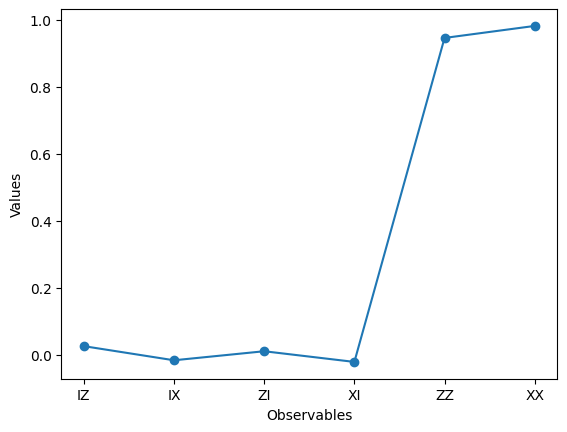

In [32]:
# Plot the result

from matplotlib import pyplot as plt

values = pub_result.data.evs
errors = pub_result.data.stds

# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

Notice that for qubits 0 and 1, the independent expectation values of both X and Z are 0, while the correlations (XX and ZZ) are 1. This is a hallmark of quantum entanglement.

why X and Z are 0 for each individual qubit?

Because when a qubit is part of an entangled pair, its individual state is completely random.
---

If we look at just qubit 0, what is its state?

With 50% probability it is 0

With 50% probability it is 1

This is a maximally mixed state.

So:

Measuring Z gives +1 half the time (state 0)

And −1 half the time (state 1). This is the same with X

Why XX and ZZ are 1?
---
Because the qubits are perfectly correlated even though each one alone is random.

If qubit 0 = 0 → qubit 1 is always 0

If qubit 0 = 1 → qubit 1 is always 1

only entangled states can satisfy these two facts at the same time, lke Bell state